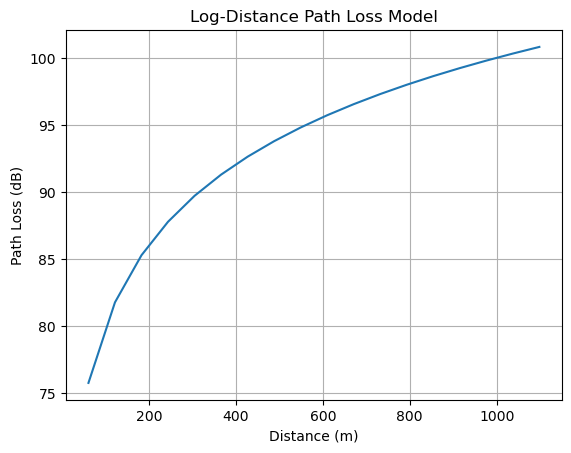

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def log_distance_path_loss(d, d0=1, n=0, X=0):
    return 20 * np.log10(d / d0) + 20 * np.log10(2.4e9) + 20 * np.log10(4 * np.pi / 3e8) - X

# Generating distances from 61 to 1129 meters
d = np.arange(61, 1130, 61)

# Calculating path loss using the log-distance path loss model
PL = log_distance_path_loss(d)

# Plot the graph
plt.plot(d, PL)
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Log-Distance Path Loss Model')
plt.grid(True)
plt.show()


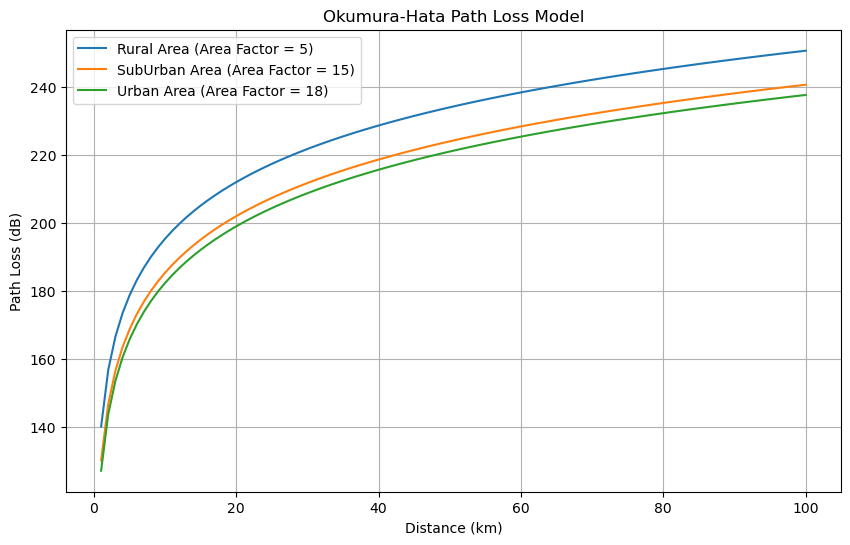

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def okumura_hata_path_loss(f, d, ht, hr, area_factor):
    free_space_path_loss = 20 * np.log10(d) + 20 * np.log10(f) + 20 * np.log10(1/1000)  # Free Space Path Loss (FPL) in dB

    additional_path_loss = 46.3 + 33.9 * np.log10(f) - 13.82 * np.log10(ht) + (44.9 - 6.55 * np.log10(ht)) * np.log10(d)  # A(f, d) component

    transmitter_receiver_gain_loss = 20 * np.log10(ht / 200) + 20 * np.log10(hr / 3)  # G(ht, hr) component

    path_loss = free_space_path_loss + additional_path_loss - transmitter_receiver_gain_loss - area_factor  # Okumura-Hata path loss model

    return path_loss

# Generating distances from 1 to 100 kilometers
distances = np.arange(1, 101, 1)

# Assume a fixed frequency (f) for this example
frequency = 900  # in MHz

# Assume fixed values for transmitter height (ht), receiver height (hr), and area factor for different scenarios
ht = 30  # height of transmitter in meters
hr = 2   # height of receiver in meters
area_factor1 = 5
area_factor2 = 15
area_factor3 = 18

# Plot the graph for different area factors
plt.figure(figsize=(10, 6))

PL1 = okumura_hata_path_loss(frequency, distances, ht, hr, area_factor1)
PL2 = okumura_hata_path_loss(frequency, distances, ht, hr, area_factor2)
PL3 = okumura_hata_path_loss(frequency, distances, ht, hr, area_factor3)

plt.plot(distances, PL1, label=f'Rural Area (Area Factor = {area_factor1})')
plt.plot(distances, PL2, label=f'SubUrban Area (Area Factor = {area_factor2})')
plt.plot(distances, PL3, label=f'Urban Area (Area Factor = {area_factor3})')

plt.xlabel('Distance (km)')
plt.ylabel('Path Loss (dB)')
plt.title("Okumura-Hata Path Loss Model")
plt.legend()
plt.grid(True)
plt.show()


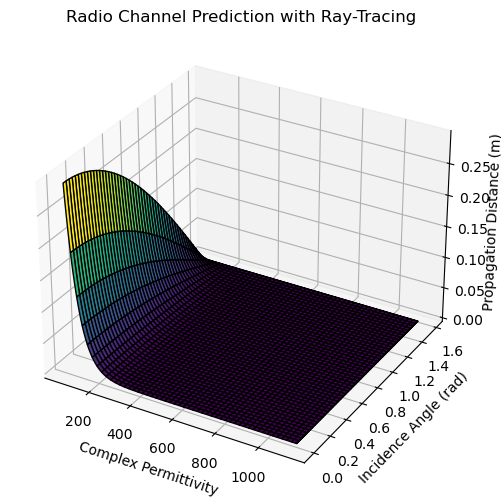

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generating data for illustration
propagation_distance = np.linspace(61, 1130, 1130)
incidence_angle = np.linspace(0, np.pi/2, 1130)
propagation_distance, incidence_angle = np.meshgrid(propagation_distance, incidence_angle)
complex_permittivity = np.cos(incidence_angle) * np.exp(-propagation_distance / 50)

# Plot 3D diagram
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(propagation_distance, incidence_angle, complex_permittivity, cmap='viridis', edgecolor='k')

ax.set_xlabel('Complex Permittivity')
ax.set_ylabel('Incidence Angle (rad)')
ax.set_zlabel('Propagation Distance (m)', rotation = 90)
ax.zaxis.labelpad = -0.1

ax.set_title('Radio Channel Prediction with Ray-Tracing')

plt.show()
